Now that you've spent some time tinkering with an example Naive Bayes Classifier, it's time to build your own.

We've mentioned that Naive Bayes is particularly good for text classification problems. Before, we made a spam filter. Now we'll perform sentiment analysis, classifying whether feedback left on a website is either positive or negative. 

Again the UCI Machine Learning database has a nice labeled dataset of sentiment labelled sentences for us to use.

Pick one of the company data files and build your own classifier. When you're satisfied with its performance (at this point just using the accuracy measure shown in the example), test it on one of the other datasets to see how well these kinds of classifiers translate form one context to another. 

Include your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor. 

In [177]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [188]:
imdb = pd.read_csv('imdb_labelled.txt', delimiter= '\t', header=None)
imdb.head()

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [189]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
0    748 non-null object
1    748 non-null int64
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


In [190]:
imdb.columns = ['review', 'positive']

In [191]:
imdb.head(20)

,review,positive
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
5,"The rest of the movie lacks art, charm, meanin...",0
6,Wasted two hours.,0
7,Saw the movie today and thought it was a good ...,1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the scien...,1


In [192]:
keywords = ['best', 'loved', 'good', 'great', 'beautiful', 'love', 'enjoyed', 'perfect', 'wonderful', 'nice', 'cool', 'treat', 'worth', 'classic', '10']

for key in keywords:
    imdb[str(key)] = imdb.review.str.contains(' '+str(key)+ ' ', case=False)

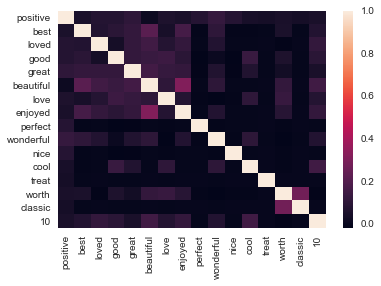

In [193]:
corr = imdb.corr()

sns.set()
sns.heatmap(corr)
plt.show()

A relatively uncorrelated batch, though still slightly positively correlated. 

In [194]:
data = imdb[keywords]
target = imdb['positive']

In [195]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)

print("Accuracy of model: {}".format((target == y_pred).sum()/data.shape[0]*100))

Accuracy of model: 60.6951871657754


In [196]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(data, target)

y_pred = gnb.predict(data)

print("Accuracy of model: {}".format((target == y_pred).sum()/data.shape[0]*100))

Accuracy of model: 54.94652406417112


In [197]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

mnb.fit(data, target)

y_pred = mnb.predict(data)

print("Accuracy of model: {}".format((target == y_pred).sum()/data.shape[0]*100))


Accuracy of model: 45.45454545454545


When selecting features, I did a brief review of the labelled reviews and tried to build up a list of keywords which seemed to make the most appearances. Achieved the best performance when ensuring low correlation between the features and managed an accuracy of 60.69%. 

In [198]:
amazon = pd.read_csv('amazon_cells_labelled.txt', delimiter='\t', header=None)

In [199]:
amazon.columns = ['review', 'pos_neg']

amazon.head()

,review,pos_neg
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [200]:
for key in keywords:
    amazon[str(key)] = amazon.review.str.contains(' '+str(key)+ ' ', case=False)

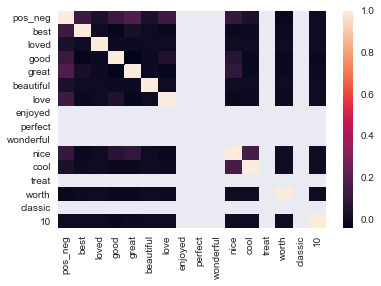

In [201]:
sns.heatmap(amazon.corr())

In [202]:
data = amazon[keywords]
target = amazon['pos_neg']

In [203]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)

print("Accuracy of model: {}".format((target == y_pred).sum()/data.shape[0]*100))

Accuracy of model: 59.4


In [204]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(data, target)

y_pred = gnb.predict(data)

print("Accuracy of model: {}".format((target == y_pred).sum()/data.shape[0]*100))

Accuracy of model: 57.199999999999996


In [205]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

mnb.fit(data, target)

y_pred = mnb.predict(data)

print("Accuracy of model: {}".format((target == y_pred).sum()/data.shape[0]*100))


Accuracy of model: 56.89999999999999


In [206]:
yelp = pd.read_csv('yelp_labelled.txt', delimiter='\t', header=None)

In [207]:
yelp.columns = ['review', 'pos_neg']
yelp.head()


,review,pos_neg
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [208]:
for key in keywords:
    yelp[str(key)] = yelp.review.str.contains(' '+str(key)+ ' ', case=False)

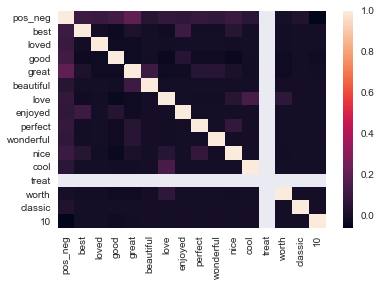

In [209]:
sns.heatmap(yelp.corr())

In [210]:
data = yelp[keywords]
target = yelp['pos_neg']

In [211]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)

print("Accuracy of model: {}".format((target == y_pred).sum()/data.shape[0]*100))

Accuracy of model: 62.4


In [212]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(data, target)

y_pred = gnb.predict(data)

print("Accuracy of model: {}".format((target == y_pred).sum()/data.shape[0]*100))

Accuracy of model: 59.0


In [213]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

mnb.fit(data, target)

y_pred = mnb.predict(data)

print("Accuracy of model: {}".format((target == y_pred).sum()/data.shape[0]*100))


Accuracy of model: 58.699999999999996


Achieved similar performance across the other data sets, indicating a lack of overfitting based on original features, with best overall performance happening on the Yelp 